# Analysis for Continuous Improvement

Author Name: Angela Lian

9-digit PID: 730391695

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should go over the quizzes in class because it will help propose questions directly to the professor ,and save time during the short amount allotted for office hours for the students enrolled in this course. 
2. The course should reinforce some of the main ideas from the videos in examples and during class time because it will create a better learning environment for the students who may have not completed understood the concepts just from the video. 
3. The course should allott more time during class to teaching the material rather than practicing environmental diagrams the whole time because it will benefit most students who find the videos hard to learn from. 
4. The course should assign more exercises that are relevant to social media because it will create more engagement and effort for the a lot of the students who spend a lot of time on social media. 
5. The course should keep the hybrid format because it will provide a balanced learning environment for the students enrolled in this class.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: The course should go over the quizzes in class because it will help propose questions directly to the professor ,and save time during the short amount allotted for office hours for the students enrolled in this course. 

2. Suggestion for how to collect data to support this idea in the future: By offering one of the asynchronous days to be dedicated towards quiz review and count how many students show up. This then can be used to see if the day offered to reveiw is something that interests a lot of students or little amount of students. 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: The course should go over the quizzes in class because it will help propose questions directly to the professor ,and save time during the short amount allotted for office hours for the students enrolled in this course.
2. This idea is more valuable than the others brainstormed because: The quizzes are a big part of the course and I think they are very helpful to the learning process but the short time allotted for office hours that could be used towards exercise questions is not very helpful. I believe this change can provide a more engaging environment for learning and improvement on the quizzes moving forward with them being a decent percentage of the student grade. The other ideas are very specific to content and student personalized whereas the quizzes idea may be able to only benefit students.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [49]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [50]:
from data_utils import read_csv_rows, count, column_values, columnar, count_greater_than, head, select, str_to_int, concat

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [51]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

# Reorganizing the data

Using the helper function read_csv_rows to read the csv, I will implement it to convert the data into a column oriented table.

In [63]:

data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
columns: dict[str, list[str]] = columnar(data_rows)

if len(data_rows) == 0:
    print("No data.")
else:
    print(f"Data File Read: {SURVEY_DATA_CSV_FILE_PATH}")
    print(f"{len(data_rows)} rows")
    print(f"{len(data_rows[0].keys())} columns")
    print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
620 rows
35 columns
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


Next, I will select the data I need which is the responses to if the quizzes are helpful or not. I will implent the select combined with the head function to select the column I would like to use and the first few rows of data.

In [53]:

selected_data: dict[str, list[str]] = select((columns), ["qz_effective"])
head(selected_data, 10)

{'qz_effective': ['5', '5', '7', '5', '6', '7', '5', '7', '7', '7']}

I then have to change the data values from the qz_effective row from str to int in order to have it be counted in a later function.

In [54]:

corrected_data = str_to_int(selected_data)

Using the count_greater_than function, I will see how many times a student voted a 5 or above that the quizzes are helpful to their learning of the topics in this course.

In [55]:

qz_greater_response = count_greater_than(corrected_data, 5)
qz_greater_response


436

I will now repeat the steps above but for a different part of the data set where students responded to see if sychronous attendance would improve their performance or not.

In [56]:
sync_data: dict[str, list[str]] = select((columns), ["sync_perf"])
head(sync_data, 10)

{'sync_perf': ['2', '3', '3', '5', '3', '2', '3', '2', '5', '2']}

In [57]:
int_sync_data = str_to_int(sync_data)
sync_perf_data = count_greater_than(int_sync_data, 5)
sync_perf_data

122

Next, with the data interpreted from the above codes, I will generate a visual to better represent the data comparsion when they are next to each other.

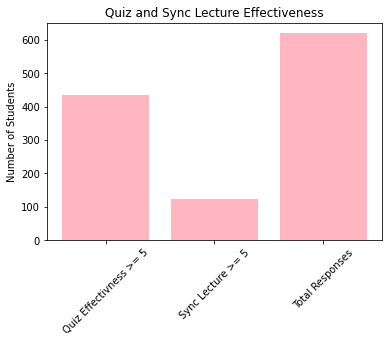

In [58]:
from matplotlib import pyplot as plt

responses = len(data_rows)

y = [qz_greater_response, sync_perf_data, responses]
x = ["Quiz Effectivness >= 5", "Sync Lecture >= 5", "Total Responses"]
plt.bar(x, y, color = 'lightpink')
plt.ylabel("Number of Students")
plt.xticks(rotation = 45)

plt.title("Quiz and Sync Lecture Effectiveness")
plt.show()

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



The idea is to review the quiz and the most commonly missed questions during in person class so that the students are able to directly ask questions to the professor himself. The scheduled time slot for office hours is not enough time, especially if the students have other questions about the assignments due that week. Additionally, tutoring is limited so it may or may not work with many of the students schedules. 

As we see in the responses of how effective are the quizzes, 436 out of 620 responses replied that a 5 or above, which shows how helpful the quizzes are to a students performance and understanding in the course. Additionally, 122 students responded with a 5 or above that synchronous lectures with required attendance would help their performance in the class. This combined with the large majority of students that found the quiz effective, going over the quizzes in person may lead to an improvement in quiz scores. A threshold of 5 was chosen to begin with since 4 did not disagree nor agree, so the count began with those who agreed. As the data does support the recommended change, this can be implemented in different ways to further evalute if this change is resulting in change of the performance. For example, evaluate the students grades on quiz 2 that attended the synchronous lesson that went over the quiz 1 mistakes. This can provide data that can be used to compare if the synchronous lectures combined with going over quizzes in class results in improvement in students like it should based on the survey data. Additionally, some adjustments can be made to accomdate both stakeholders such as providing a separate in person session for those who want to look over the quiz outside of class time. This benefits those who prefer synchronous and need to go over mistakes in person and does not remove lecture time.

However, we see that 122 is not a large majority of the responses. In fact, it is less than 25% of the responses. This means in person review of the quizzes may not necessarily effect the group whom find asychronous better, but rather redirect the time in class that could be spent reveiwing the new material for the next lesson. This could potentially increase the outside class workload in order to designate time in class to review the quiz. 